Mean Squared Error: 1.939056446247743


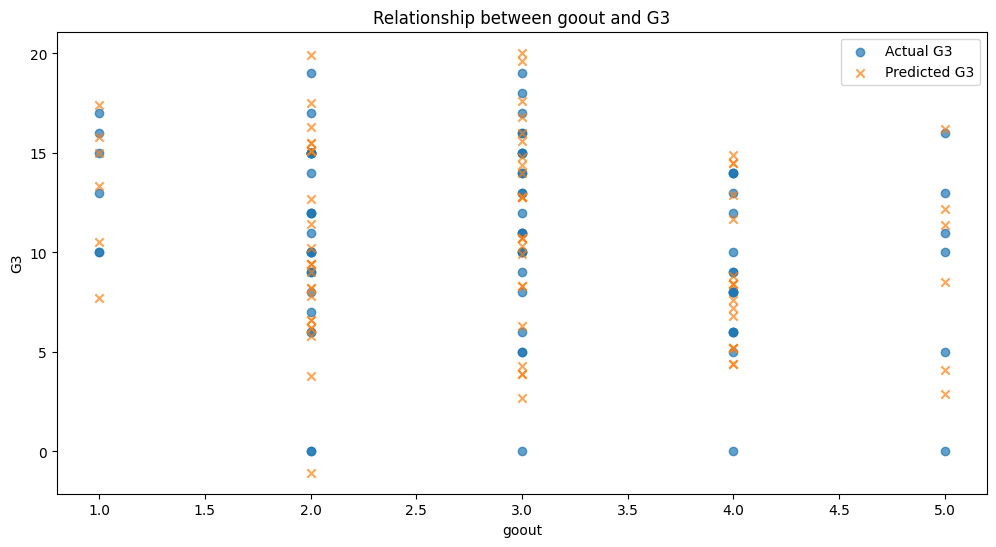

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['goout', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'goout']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a DataFrame with the original 'goout' and mean_G columns and predicted/actual G3 values
# plot_data = pd.DataFrame({'goout': X_test['goout_2'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})
plot_data = pd.DataFrame({'goout': df.loc[X_test.index, 'goout'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'goout' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['goout'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['goout'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('goout')
plt.ylabel('G3')
plt.title('Relationship between goout and G3')
plt.legend()
plt.show()